# LESSON 7: K-MEANS CLUSTERING
<table><tr>
<td> <img src="../images/clustering_logo.png" width="500px"/> </td>
</tr></table>

*This lecture was refered by [machinelearningcoban.com](https://machinelearningcoban.com/2017/01/01/kmeans/)*

## 1. K-means clustering introduction

<img src="../images/kmeans_example.png" width="400px"/>

With the dataset contains lots of data points without label, we have to group these data points into K clusters and we expect that samples in the same cluster will have similar features. The algorithm to solve this problem is called ***K-MEANS CLUSTERING***.

<img src="../images/kmeans_example_5_clusters.png" width="400px"/>

In 2D space, we can see that the region of each cluster is a polygon with a line border. This line border is the mid perpendicular of a line connect 2 centers.

Assume that we have N data point $X = [x_1, x_2, \dots, x_N]$ and K < N is the number of clusters. We have to find $M = [m_1, m_2, \dots, m_K]$ which is the center (or representatives) of K clusters and $Y = [y_1, y_2, \dots, y_N]$ which is the label of N data points.

Label $y_i$ of a sample is encoded into one-hot type, which means $y_i = [y_{i1}, y_{i2}, \dots, y_{iK}]$ and $y_{ij} = 1$ if $x_i$ is predicted to belong to cluster $j$.

So, we have

<center>
\[
 y_{ik} \in \{0, 1\} \\
 \sum_{k = 1}^K y_{ik} = 1
\]
</center>

## 2. Loss function and Optimizer for K-means clustering
The main target of clustering technique is to minimize the distance between each data point and its center.

If data point $x_i$ belong to cluster $m_k$, so $y_{ik} = 1$ and $y_{ij} = 0$ with $\forall j \neq k$

<center>
    \[
    D(x_i, m_k) = (x_i - m_k)^2 \\
    D(x_i, m_k) = \sum_{j=1}^K y_{ij}(x_i - m_j)^2
    \]
</center>

We have the loss function for the whole dataset

<center>
    \[
    \mathcal{L}(Y, M) = MSE(Y, M)
    = \sum_{i=1}^{N}\sum_{j=1}^{K}y_{ij}(x_i - m_j)^2
    \]
</center>

With two variables $Y$ and $M$, to optimize the loss function, we fix one variable and optimize another and vice versa. Specifically, we solve two problems: Fixed $M$, optimize $Y$ and Fix $Y$, optimize $M$ respectively.

### Fixed M, optimize Y
For each data point $x_i$,

<center>
    \[
    y_i = arg \min_{y_i} \mathcal{L}(y_i) \\
    = arg \min_{y_i} \sum_{j=1}^{K}y_{ij}(x_i - m_j)^2
    \]
</center>

We need to find only one $y_i$ for each $x_i$ so this problem is solved by assign the label of each $x_i$ as the **nearest center** of it.

### Fixed Y, optimize M
For each existing cluster,

<center>
    \[
    m_j = arg \min_{m_j} \mathcal{L}(m_j) \\
    = arg \min_{m_j} \sum_{i=1}^{N}y_{ij}(x_i - m_j)^2
    \]
</center>

We need to find only one $m_j$ for each existing cluster

Calculate derivative of $\mathcal{L}(m_j)$ with $m_j$ and solve the derivative function

<center>
    \[
    \frac{\partial \mathcal{L}(m_j)}{\partial m_j} = 2 \sum_{i=1}^{N}y_{ij}(m_j - x_i) = 0 \\
    m_j \sum_{i=1}^{N}y_{ij} = \sum_{i=1}^{N}y_{ij}x_i \\
    m_j = \frac{\sum_{i=1}^{N}y_{ij}x_i}{\sum_{i=1}^{N}y_{ij}} \\
    m_j = \frac{\text{Sum of all data points in cluster} j}{\text{Number of data points in cluster} j}
    \]
</center>

That's why we call this algorithm ***k-means clustering***.

## 3. The algorithm
***Input:*** Dataset contains N samples, K clusters.

***Output:*** N label y for each data sample, K center m for each cluster.

***Step 1:*** Randomly choose K data points as initialized cluster center.

***Step 2:*** Assign label for each data point by nearest center.

***Step 3:***
- If the results of ***Step 2*** is same as the previous iteration:
    - Stop the algorithm
- Else:
    - Continue the next step.

***Step 4:*** Calculate the new cluster center by the mean of data point in this cluster.

***Step 5:*** Go back to ***Step 2***.

## 4. Weaknesses of K-means clustering
### We need to define number of clusters K
In some cases, we don't know the number of cluster and this is an obstacle while using K-means clustering

### Clustering results is highly depended on initialization
#### Slow convergence

<img src="../images/kmeans_slow_converge.gif" width="500px"/>

#### Bad results
<img src="../images/kmeans_bad_result.gif" width="500px"/>

We can overcome this problem by running K-means clustering multiple times and choose the best results. Or there are some upgraded versions of K-means clustering like K-means++.

### Clusters must be round in shape

<img src="../images/kmeans_diff_cov.gif" width="500px"/>


### K-means clustering doesn't work with non-convex dataset

<img src="../images/kmeans_smile_face.png" width="500px"/>

## 5. Implementation example

### 5.1. Prepare library and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df = iris_df.drop(columns=['sepal_length', 'sepal_width'])
df

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


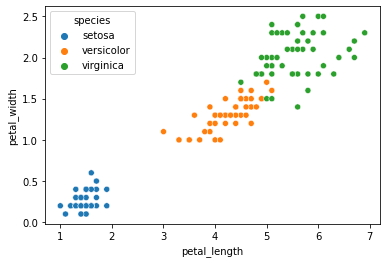

In [4]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()

In [5]:
X = np.array(df.iloc[:, :2])
X.shape

(150, 2)

### 5.2. Implement from scratch

In [6]:
class MyKMeans():

    def __init__(self, num_clusters):
        self.num_clusters = num_clusters

    def init_centers(self, X):
        self.centers = X[np.random.choice(
            X.shape[0],
            self.num_clusters,
            replace=False
        )]

    def assign_clusters(self, X):
        # calculate pairwise distances between data points and centers
        D = cdist(X, self.centers)
        # return index of the closest center
        return np.argmin(D, axis=1)

    def update_centers(self, X, labels):
        centers = np.zeros((self.num_clusters, X.shape[1]))
        for k in range(self.num_clusters):
            # collect all points assigned to the k-th cluster 
            Xk = X[labels == k, :]
            # take average
            centers[k,:] = np.mean(Xk, axis = 0)
        self.centers = centers 

    def has_converged(self, prev_centers):
        # return True if two sets of centers are the same
        return (set([tuple(a) for a in prev_centers]) == \
                set([tuple(a) for a in self.centers]))
    
    def __call__(self, X):
        self.init_centers(X)
        centers = [self.centers]
        cluster_preds = []
        
        while True:
            cluster_preds.append(self.assign_clusters(X))
            self.update_centers(X, cluster_preds[-1])
            if self.has_converged(centers[-1]):
                break
            centers.append(self.centers)

        return centers, cluster_preds

In [7]:
my_kmeans = MyKMeans(num_clusters=3)

In [8]:
centers, cluster_preds = my_kmeans(X)

In [9]:
def visualize_clusters(X, cluster_preds):
    colors = ['r', 'g', 'b']
    for x, cluster in zip(X, cluster_preds):
        plt.plot(x[0], x[1], f'{colors[cluster]}o')
    plt.show()

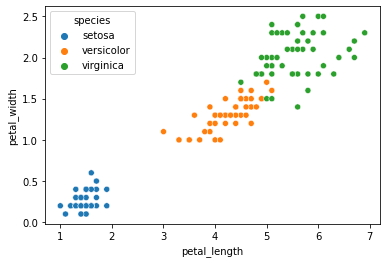

In [10]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()

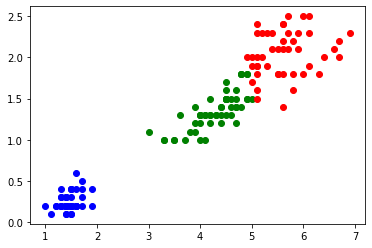

In [11]:
visualize_clusters(X, cluster_preds[-1])

### 5.3. Use `sklearn`

In [12]:
from sklearn.cluster import KMeans

In [13]:
sklearn_kmeans = KMeans(n_clusters=3, random_state=1511)
sklearn_kmeans

KMeans(n_clusters=3, random_state=1511)

In [14]:
sklearn_kmeans.fit(X)

KMeans(n_clusters=3, random_state=1511)

In [15]:
sklearn_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

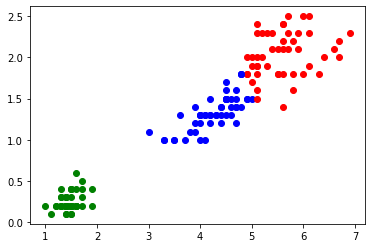

In [16]:
visualize_clusters(X, sklearn_kmeans.labels_)

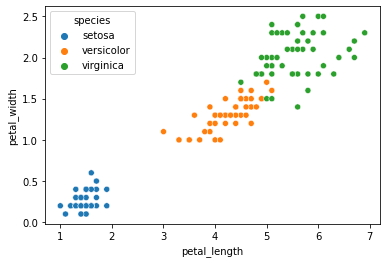

In [17]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()

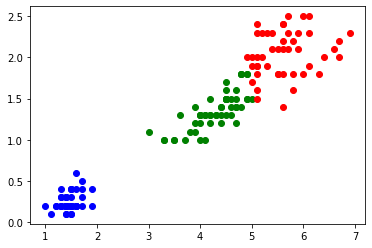

In [18]:
visualize_clusters(X, cluster_preds[-1])

In [19]:
sklearn_kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [20]:
centers[-1]

array([[5.62608696, 2.04782609],
       [4.29259259, 1.35925926],
       [1.462     , 0.246     ]])

## 6. Homework